### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/09/12/news-recommendation-system-using-python/

In [5]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

import zipfile
import requests
import io

In [6]:
url = 'https://statso.io/wp-content/uploads/2022/11/News.csv.zip'
filename = 'News.csv'

In [7]:
r = requests.get(url).content
files = zipfile.ZipFile(io.BytesIO(r))
data_csv = files.open(filename)
data = pd.read_csv(data_csv)

In [8]:
data.head()

,ID,News Category,Title,Summary
0,N88753,lifestyle,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N45436,news,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...
2,N23144,health,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
3,N86255,health,Dispose of unwanted prescription drugs during ...,NaN
4,N93187,news,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             101527 non-null  object
 1   News Category  101527 non-null  object
 2   Title          101527 non-null  object
 3   Summary        96112 non-null   object
dtypes: object(4)
memory usage: 3.1+ MB


In [10]:
data = data.drop('Summary', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             101527 non-null  object
 1   News Category  101527 non-null  object
 2   Title          101527 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [11]:
cols = [i.lower().replace(' ', '_') for i in data.columns]
data.columns = cols
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             101527 non-null  object
 1   news_category  101527 non-null  object
 2   title          101527 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


<AxesSubplot:>

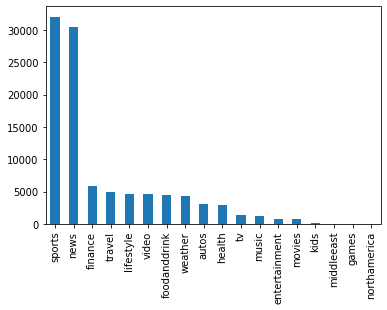

In [12]:
data.news_category.value_counts().plot(kind='bar')

In [13]:
cats = data.news_category.value_counts()
indexes = cats.index
vals = cats.values
fig = px.bar(data, x=indexes, y=vals, title='Types of Categories')
fig.update_xaxes(title='Categories')
fig.update_yaxes(title='Values')
fig.show()

## Reduction in order to run

In [42]:
rand = np.random.randint(1,101000, 30000)

In [43]:
red_data = data.iloc[rand]
red_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 60039 to 87502
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             30000 non-null  object
 1   news_category  30000 non-null  object
 2   title          30000 non-null  object
dtypes: object(3)
memory usage: 937.5+ KB


In [44]:
red_data.reset_index(drop=True, inplace=True)
red_data.head()

,id,news_category,title
0,N38002,news,Oklahoma lake officials warning residents agai...
1,N113167,news,Brooklyn protests: Hundreds accuse the NYPD of...
2,N92090,news,Thieves break into Harley-Davidson store in Ca...
3,N27682,sports,Memphis star Wiseman's eligibility in question
4,N57614,news,Barcelona mayor pleads for violence in Catalon...


In [45]:
feature = red_data.title.tolist()
feature[:10]

['Oklahoma lake officials warning residents against bringing guns to property',
 'Brooklyn protests: Hundreds accuse the NYPD of brutality after a violent subway video',
 'Thieves break into Harley-Davidson store in California, ignore motorcycles, steal leather',
 "Memphis star Wiseman's eligibility in question",
 'Barcelona mayor pleads for violence in Catalonia to stop',
 "Bachelor' Creator Mike Fleiss and Wife Laura Reconcile After 'Emotionally-Charged Incident'",
 'Four prominent Dayton-area restaurants may get new ownership',
 'Sea urchin explosion off California, Oregon decimates kelp',
 'The cost of not expanding Medicaid in Fla.? Nearly 2,800 deaths, a new report estimates',
 'Local furniture store sets opening date next month']

In [46]:
tfdif = text.TfidfVectorizer(input=feature, stop_words='english')
tfdif_matrix = tfdif.fit_transform(feature)

In [47]:
similarity = cosine_similarity(tfdif_matrix)

In [48]:
indices = pd.Series(red_data.index, index=red_data['title']).drop_duplicates()

In [49]:
def news_recom(title, similarity=similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    newsindices = [i[0] for i in similarity_scores]
    return red_data['title'].iloc[newsindices]

In [59]:
news_recom('Four prominent Dayton-area restaurants may get new ownership')

6        Four prominent Dayton-area restaurants may get...
26928    Four Prominent Beverly Hills Restaurants Shut ...
17581      Oregonia restaurant to open under new ownership
23939    Iconic Hamilton restaurant reopens under new o...
4891     Four Dayton-area residents join Ohio Veterans ...
8088     Four Dayton-area residents join Ohio Veterans ...
26496    Four Dayton-area residents join Ohio Veterans ...
6903     Design firm with Dayton-area ties announces ac...
25388    Dayton-area's last abortion clinic gets licens...
11392    New cars and trucks: Vehicle ownership costs r...
Name: title, dtype: object

In [61]:
index2 = indices['Four prominent Dayton-area restaurants may get new ownership']
index2

6

In [68]:
sim_scores = list(enumerate(similarity[index2]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[0:10]
arts = [i[0] for i in sim_scores]
red_data['title'].iloc[arts]

6        Four prominent Dayton-area restaurants may get...
26928    Four Prominent Beverly Hills Restaurants Shut ...
17581      Oregonia restaurant to open under new ownership
23939    Iconic Hamilton restaurant reopens under new o...
4891     Four Dayton-area residents join Ohio Veterans ...
8088     Four Dayton-area residents join Ohio Veterans ...
26496    Four Dayton-area residents join Ohio Veterans ...
6903     Design firm with Dayton-area ties announces ac...
25388    Dayton-area's last abortion clinic gets licens...
11392    New cars and trucks: Vehicle ownership costs r...
Name: title, dtype: object